# Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow.compat.v2.feature_column as fc
import statsmodels.api as sm
import seaborn as sns
import matplotlib.patches as mpatches
import pandas_profiling as pdp
import tensorflow as tf
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report
from sklearn.metrics import auc, roc_auc_score, roc_curve, precision_recall_curve, f1_score
from IPython.display import clear_output
from six.moves import urllib
from __future__ import absolute_import, division, print_function, unicode_literals

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Loading Dataset

In [ ]:
from pandas import read_csv
df= pd.read_csv('onlinedeliverydata.csv')
df


,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,...,Less Delivery time,High Quality of package,Number of calls,Politeness,Freshness,Temperature,Good Taste,Good Quantity,Output,Reviews
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,...,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Yes,Nil\n
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,...,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Yes,Nil
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,...,Important,Very Important,Moderately Important,Very Important,Very Important,Important,Very Important,Moderately Important,Yes,"Many a times payment gateways are an issue, so..."
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,...,Very Important,Important,Moderately Important,Very Important,Very Important,Very Important,Very Important,Important,Yes,nil
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,...,Important,Important,Moderately Important,Important,Important,Important,Very Important,Very Important,Yes,NIL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,23,Female,Single,Student,No Income,Post Graduate,2,12.9766,77.5993,560001,...,Important,Important,Important,Important,Important,Important,Important,Important,Yes,Nil
384,23,Female,Single,Student,No Income,Post Graduate,4,12.9854,77.7081,560048,...,Moderately Important,Very Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Very Important,Very Important,Yes,Nil
385,22,Female,Single,Student,No Income,Post Graduate,5,12.9850,77.5533,560010,...,Important,Very Important,Important,Important,Very Important,Very Important,Very Important,Very Important,Yes,Nil
386,23,Male,Single,Student,Below Rs.10000,Post Graduate,2,12.9770,77.5773,560009,...,Important,Very Important,Important,Very Important,Very Important,Important,Very Important,Very Important,Yes,Language barrier is also one major issue. Mosl...


# Data Preprocessing

In [ ]:
df1=df.copy()
# Yes= 0, No =1
# No income= 0, below 10000 = 1, 10001-25000 = 2, 25001- 50000 = 3, More than 50000= 4
# Male=1, Female=0
# Strongly disagree=0, disagree=1, neutral=2, Agree=3, strongly agree=4
# Snacks = 0, Sweets = 1, Breakfast, Lunch and dinner= 2 in preference
# 'Non Veg foods (Lunch / Dinner)= 3, Veg foods (Breakfast / Lunch / Dinner) =2, Sweets=1, Bakery items (snacks) =0
#'Food delivery apps' = 0, 'Walk-in'= 1, 'Direct call'= 2, 'Web browser'=3

df1.drop(['Medium (P2)', 'Meal(P2)', 'Perference(P2)', 'latitude', 'longitude', 'Reviews', 'Pin code'], axis=1, inplace=True)
df1.rename(columns={'Perference(P1)': 'Preference', 'Medium (P1)':'Medium', 'Meal(P1)':'Meal'}, inplace=True)
df1.columns=df1.columns.str.replace(' ', '_')
df1.replace(['Yes', 'No'], [1, 0], inplace=True)
df0=df1.copy()

df1['Monthly_Income'].replace(['No Income', 'Below Rs.10000', 'More than 50000', '10001 to 25000',
       '25001 to 50000'], [0, 1, 2, 3, 4], inplace = True)
df1['Gender'].replace(['Male', 'Female'], [1, 0], inplace=True)
df1.replace(['Neutral', 'Strongly agree', 'Agree', 'Strongly disagree',
       'Disagree', 'Strongly Agree'], [2, 4, 3, 0, 1, 4], inplace=True)
df1.replace(['Moderately Important', 'Very Important', 'Important',
       'Slightly Important', 'Unimportant'], [1, 4, 3, 2, 0], inplace=True)



df1['Preference'].replace(['Non Veg foods (Lunch / Dinner)',
       'Veg foods (Breakfast / Lunch / Dinner)', 'Bakery items (snacks)',
       'Sweets'], [3, 2, 0, 1], inplace=True)
df1.replace(['Breakfast', 'Snacks', ' Snacks', 'Lunch', ' Lunch', 'Dinner',  ' Dinner'], [1, 0, 0, 2, 2, 3, 3], inplace=True)

df1.replace(['Food delivery apps', 'Walk-in', 'Direct call', 'Web browser', 'Maybe'], [0, 1, 2, 3, 2], inplace=True)
df1['Marital_Status']=df1['Marital_Status'].astype('category').cat.codes
df1['Educational_Qualifications']=df1['Educational_Qualifications'].astype('category').cat.codes
df1['Order_Time']=df1['Order_Time'].astype('category').cat.codes
df1['Maximum_wait_time']=df1['Maximum_wait_time'].astype('category').cat.codes
df1['Occupation']=df1['Occupation'].astype('category').cat.codes


In [ ]:
df1.head()

,Age,Gender,Marital_Status,Occupation,Monthly_Income,Educational_Qualifications,Family_size,Medium,Meal,Preference,...,Influence_of_rating,Less_Delivery_time,High_Quality_of_package,Number_of_calls,Politeness,Freshness_,Temperature,Good_Taste_,Good_Quantity,Output
0,20,0,2,3,0,2,4,0,1,3,...,1,1,1,1,1,1,1,1,1,1
1,24,0,2,3,1,0,3,0,0,3,...,1,4,4,4,4,4,4,4,4,1
2,22,1,2,3,1,2,3,0,2,3,...,1,3,4,1,4,4,3,4,1,1
3,22,0,2,3,0,0,6,0,0,2,...,1,4,3,1,4,4,4,4,3,1
4,22,1,2,3,1,2,4,1,2,3,...,1,3,3,1,3,3,3,4,4,1


In [ ]:
print('Monthly Income',df['Monthly Income'].unique())
print ('Time saving:', df['Time saving'].unique(), '\n',
'Good Quantity', df['Good Quantity'].unique(), '\n',
'Meal (P1)', df['Meal(P1)'].unique(), '\n',
'Meal(P2)', df['Meal(P2)'].unique(), '\n',
'Preference(P1)', df['Perference(P1)'].unique(), '\n',
'Preference(P2)', df['Perference(P2)'].unique(), '\n',
'Order Time', df['Order Time'].unique(), '\n',
'Maximum wait time', df['Maximum wait time'].unique(), '\n',
'Output', df['Output'].unique()
)

Monthly Income ['No Income' 'Below Rs.10000' 'More than 50000' '10001 to 25000'
 '25001 to 50000']
Time saving: ['Neutral' 'Strongly agree' 'Agree' 'Disagree' 'Strongly disagree'] 
 Good Quantity ['Moderately Important' 'Very Important' 'Important' 'Slightly Important'
 'Unimportant'] 
 Meal (P1) ['Breakfast' 'Snacks' 'Lunch' 'Dinner'] 
 Meal(P2) [' Lunch' ' Dinner' ' Snacks'] 
 Preference(P1) ['Non Veg foods (Lunch / Dinner)' 'Veg foods (Breakfast / Lunch / Dinner)'
 'Bakery items (snacks)' 'Sweets'] 
 Preference(P2) [' Bakery items (snacks)' ' Veg foods (Breakfast / Lunch / Dinner)'
 ' Ice cream / Cool drinks' ' Sweets'] 
 Order Time ['Weekend (Sat & Sun)' 'Anytime (Mon-Sun)' 'Weekdays (Mon-Fri)'] 
 Maximum wait time ['30 minutes' '45 minutes' '60 minutes' 'More than 60 minutes'
 '15 minutes'] 
 Output ['Yes' 'No']


## Splitting Training and Testing Dataset

In [ ]:
import sklearn.model_selection as sk
from sklearn.model_selection import train_test_split

df_train, df_test, y_train, y_test = sk.train_test_split(df1, df1['Output'],test_size=0.3, random_state = 42)
df_train= df_train.drop('Output', axis=1)
df_test=df_test.drop('Output', axis=1)

In [ ]:
df1.columns.groupby(df1.dtypes)

{int8: ['Marital_Status', 'Occupation', 'Educational_Qualifications', 'Order_Time', 'Maximum_wait_time'], int64: ['Age', 'Gender', 'Monthly_Income', 'Family_size', 'Medium', 'Meal', 'Preference', 'Ease_and_convenient', 'Time_saving', 'More_restaurant_choices', 'Easy_Payment_option', 'More_Offers_and_Discount', 'Good_Food_quality', 'Good_Tracking_system', 'Self_Cooking', 'Health_Concern', 'Late_Delivery', 'Poor_Hygiene', 'Bad_past_experience', 'Unavailability', 'Unaffordable', 'Long_delivery_time', 'Delay_of_delivery_person_getting_assigned', 'Delay_of_delivery_person_picking_up_food', 'Wrong_order_delivered', 'Missing_item', 'Order_placed_by_mistake', 'Influence_of_time', 'Residence_in_busy_location', 'Google_Maps_Accuracy', 'Good_Road_Condition', 'Low_quantity_low_time', 'Delivery_person_ability', 'Influence_of_rating', 'Less_Delivery_time', 'High_Quality_of_package', 'Number_of_calls', 'Politeness', 'Freshness_', 'Temperature', 'Good_Taste_', 'Good_Quantity', 'Output']}

# Machine Learning Models

## Linear Classifier

In [ ]:
Numeric_columns = ['Age', 'Gender', 'Marital_Status', 'Occupation', 'Monthly_Income',
       'Educational_Qualifications', 'Family_size', 'Medium', 'Meal',
       'Preference', 'Ease_and_convenient', 'Time_saving',
       'More_restaurant_choices', 'Easy_Payment_option',
       'More_Offers_and_Discount', 'Good_Food_quality', 'Good_Tracking_system',
       'Self_Cooking', 'Health_Concern', 'Late_Delivery', 'Poor_Hygiene',
       'Bad_past_experience', 'Unavailability', 'Unaffordable',
       'Long_delivery_time', 'Delay_of_delivery_person_getting_assigned',
       'Delay_of_delivery_person_picking_up_food', 'Wrong_order_delivered',
       'Missing_item', 'Order_placed_by_mistake', 'Influence_of_time',
       'Order_Time', 'Maximum_wait_time', 'Residence_in_busy_location',
       'Google_Maps_Accuracy', 'Good_Road_Condition', 'Low_quantity_low_time',
       'Delivery_person_ability', 'Influence_of_rating', 'Less_Delivery_time',
       'High_Quality_of_package', 'Number_of_calls', 'Politeness',
       'Freshness_', 'Temperature', 'Good_Taste_', 'Good_Quantity']

feature_columns=[]

for feature_name in Numeric_columns:
  feature_columns.append(tf.feature_column.numeric_column(feature_name, dtype=tf.float32))

In [ ]:
def make_input_fn(data, label, num_epochs=10, shuffle=True, batch_size=32):
  def input_fn1():
    ds=tf.data.Dataset.from_tensor_slices((dict(data), label)) 
    if shuffle:
        ds=ds.shuffle(1000)
    ds=ds.batch(batch_size).repeat(num_epochs)
    return ds
  return input_fn1

train_input_fn= make_input_fn(df_train, y_train)
test_input_fn= make_input_fn(df_test, y_test, num_epochs=1, shuffle= False)

linear_est=tf.estimator.LinearClassifier(feature_columns=feature_columns)
linear_est.train(train_input_fn)
result=linear_est.evaluate(test_input_fn)
clear_output()


print(result['accuracy']* 100)
# print(result[1])

84.61538553237915


In [ ]:
print(result)

{'accuracy': 0.84615386, 'accuracy_baseline': 0.8119658, 'auc': 0.9588517, 'auc_precision_recall': 0.99046266, 'average_loss': 0.35751662, 'label/mean': 0.8119658, 'loss': 0.38155758, 'precision': 0.84070796, 'prediction/mean': 0.9297563, 'recall': 1.0, 'global_step': 90}


## Deep Neural Network Classifier

In [ ]:
def input_fn1(features, labels, training=True, batch_size=256):
  data1= tf.data.Dataset.from_tensor_slices((dict(features), labels))
  if training:
    data1=data1.shuffle(1000).repeat()
  return data1.batch(batch_size)

class_feature_columns=[]
for key in df_train.keys():
  class_feature_columns.append(tf.feature_column.numeric_column(key=key))
print (class_feature_columns)

[NumericColumn(key='Age', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='Gender', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='Marital_Status', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='Occupation', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='Monthly_Income', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='Educational_Qualifications', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='Family_size', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='Medium', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='Meal', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='Preference', shape=(1,), default_value=None, dtyp

In [ ]:
classifier1= tf.estimator.DNNClassifier(
    feature_columns= class_feature_columns,
    hidden_units= [30, 10],
    n_classes=3
)
# Training 
classifier1.train(
    input_fn= lambda: input_fn1(df_train, y_train, training=True),
    steps=3000
)
clear_output()

In [ ]:
result1=classifier1.evaluate(
    input_fn= lambda: input_fn1(df_test, y_test, training=False)
)
clear_output()
result1['accuracy']

0.9230769

In [ ]:
print (result1)

{'accuracy': 0.9230769, 'average_loss': 0.2595931, 'loss': 0.2595931, 'global_step': 3000}


## Logistic Regression using Scikit Learn

In [ ]:
# Scaling the dataset
from sklearn.preprocessing import StandardScaler
sc_x=StandardScaler()
df_train1=sc_x.fit_transform(df_train)
df_test1=sc_x.transform(df_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
clf_log=LogisticRegression(solver='liblinear', random_state =0)
clf_log.fit(df_train, y_train)
y_pred_log=clf_log.predict(df_test)

print('Accuracy:', accuracy_score(y_test, y_pred_log)*100 , '%')
print ('Confusion Matrix: \n', confusion_matrix(y_test, y_pred_log))
print('Intercept:', clf_log.intercept_)
print('Coefficient: \n', clf_log.coef_)
print('Score:', clf_log.score)
print('Predition:', list(y_pred_log))
print('Real Values:', list(y_test))
print('\n ')
print ('Classification Report \n', classification_report(y_test, clf_log.predict(df_test)))



Accuracy: 91.45299145299145 %
Confusion Matrix: 
 [[15  7]
 [ 3 92]]
Intercept: [0.51149882]
Coefficient: 
 [[ 0.01052785  0.14260848 -0.3091533   0.11462686 -0.38348612  0.27144463
   0.19399829  1.06132318 -0.42057605  0.78500319  1.22620095  0.32129978
  -0.07561275  0.52546268  0.41781542 -0.11922213  0.06310555 -0.44226144
   0.00595872 -0.88718692  0.45431646  0.33939379  0.59029133 -0.92367394
   0.33374543 -0.44948    -0.02550616  0.0170804  -0.56572307  0.61671316
  -0.19314884 -0.04616292 -0.00842938  0.0925573   0.19069265  0.11312472
  -0.06361538 -0.28692702  0.36126207  0.08965097  0.20903223 -1.12344077
  -0.56045767  0.04208903 -0.24507465  0.17301416 -0.27384488]]
Score: <bound method ClassifierMixin.score of LogisticRegression(random_state=0, solver='liblinear')>
Predition: [0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

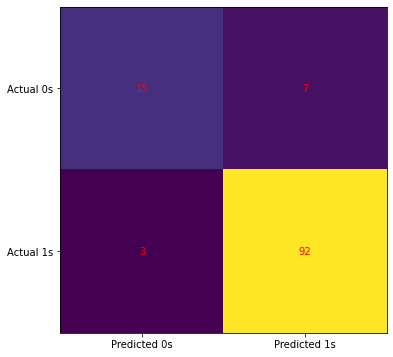

In [ ]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.imshow(confusion_matrix(y_test, y_pred_log))
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, confusion_matrix(y_test, y_pred_log)[i, j], ha='center', va='center', color='red')
plt.show()

### Hyperparameteric Tuning

#### Grid Search

In [ ]:
# Grid Search
from sklearn.model_selection import GridSearchCV
params_grid_log={"C":np.logspace(-3,3,20)} 
clf_log_grid=GridSearchCV(LogisticRegression(), params_grid_log, cv=10)
clf_log_grid.fit(df_train, y_train)

y_pred_log_grid=clf_log_grid.predict(df_test)
print('Accuracy of training dataset:', format(clf_log_grid.best_score_ *100))
print('Accuracy of testing dataset:', accuracy_score(y_test, y_pred_log_grid)*100)
print('Confusion Matrix:', confusion_matrix(y_test, y_pred_log_grid))
print('Best Parameters:', clf_log_grid.best_params_)

Accuracy of training dataset: 89.28571428571426
Accuracy of testing dataset: 92.3076923076923
Confusion Matrix: [[15  7]
 [ 2 93]]
Best Parameters: {'C': 0.018329807108324356}


In [ ]:
# from sklearn.model_selection import RandomSearchCV

params_grid_log={"C":np.logspace(-3,3,20)} 
clf_log_grid=GridSearchCV(LogisticRegression(), params_grid_log, cv=10)
clf_log_grid.fit(df_train, y_train)

y_pred_log_grid=clf_log_grid.predict(df_test)
print('Accuracy of training dataset:', format(clf_log_grid.best_score_ *100))
print('Accuracy of testing dataset:', accuracy_score(y_test, y_pred_log_grid)*100)
print('Confusion Matrix:', confusion_matrix(y_test, y_pred_log_grid))
print('Best Parameters:', clf_log_grid.best_params_)

Accuracy of training dataset: 89.28571428571426
Accuracy of testing dataset: 92.3076923076923
Confusion Matrix: [[15  7]
 [ 2 93]]
Best Parameters: {'C': 0.018329807108324356}


### Evaluation Metrics

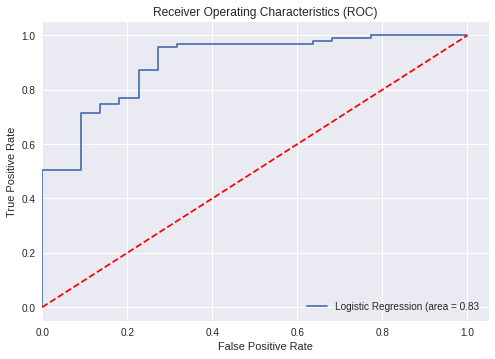

In [ ]:
#visualizing performance of model
# 'Roc-Auc score' function calculates the AUC Scores
plt.style.use('seaborn')

fpr_log, tpr_log, thresholds_log = roc_curve (y_test, clf_log.predict_proba (df_test)[:, 1])
precision_log, recall_log, thres_log = precision_recall_curve(y_test, clf_log.predict_proba(df_test)[:, 1])

roc_auc_log=roc_auc_score(y_test, y_pred_log)
F1_log = f1_score(y_test, y_pred_log)
accuracy_log= accuracy_score(y_test, y_pred_log)
auc_score_log = auc(recall_log, precision_log)

plt.figure()
plt.plot(fpr_log, tpr_log, label='Logistic Regression (area = %0.2f'% roc_auc_log)

plt.plot([0,1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.xlim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristics (ROC)')
plt.legend(loc='Lower Right')
plt.savefig('Log_ROC')
plt.show()

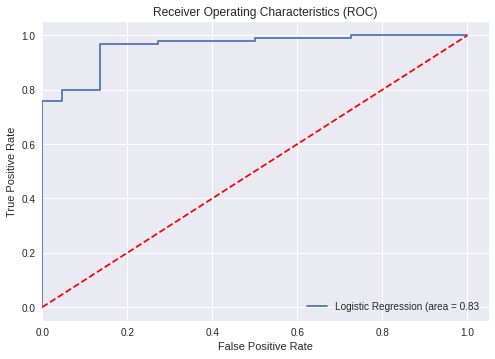

In [ ]:
#visualizing performance of model with Grid Search
# 'Roc-Auc score' function calculates the AUC Scores


fpr_log_grid, tpr_log_grid, thresholds_log_grid = roc_curve (y_test, clf_log_grid.predict_proba (df_test)[:, 1])
precision_log_grid, recall_log_grid, thres_log_grid = precision_recall_curve(y_test, clf_log_grid.predict_proba(df_test)[:, 1])

roc_auc_log_grid=roc_auc_score(y_test, y_pred_log_grid)
F1_log_grid = f1_score(y_test, y_pred_log_grid)
accuracy_log_grid= accuracy_score(y_test, y_pred_log_grid)
auc_score_log_grid = auc(recall_log_grid, precision_log_grid)

plt.figure()
plt.plot(fpr_log_grid, tpr_log_grid, label='Logistic Regression (area = %0.2f'% roc_auc_log_grid)

plt.plot([0,1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.xlim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristics (ROC)')
plt.legend(loc='Lower Right')
plt.savefig('log_grid_ROC')
plt.show()

## Naive Bayes

In [ ]:
# Multinomial Naive Bayes

from sklearn.naive_bayes import MultinomialNB
clf_mNB=MultinomialNB(alpha=0.01)
clf_mNB.fit(df_train, y_train)
print(clf_mNB.score(df_test, y_test))

0.9230769230769231


In [ ]:
# Gaussian Naive Bayes

from sklearn.naive_bayes import GaussianNB
clf_gNB= GaussianNB()
clf_gNB.fit(df_train, y_train)
print('Accuracy of Gaussian NB-Without Scaling:', clf_gNB.score(df_test, y_test))

clf_gNB_scaled=GaussianNB()
clf_gNB_scaled.fit(df_train1, y_train)
print('Accuracy of Gaussian NB after scaling:', clf_gNB_scaled.score(df_test1, y_test))

Accuracy of Gaussian NB-Without Scaling: 0.7094017094017094
Accuracy of Gaussian NB after scaling: 0.6410256410256411


### Evaluation Metrics

In [ ]:
y_pred_mNB=clf_mNB.predict(df_test)
y_proba_mNB = clf_mNB.predict_proba(df_test)[:,1]
roc_auc_mNB=roc_auc_score(y_test, y_proba_mNB)
fpr_mNB, tpr_mNB, thresholds_mNB=roc_curve (y_test, y_proba_mNB)
precision_mNB, recall_mNB, thres_mNB= precision_recall_curve(y_test, y_proba_mNB)
auc_score_mNB = auc(recall_mNB, precision_mNB)
F1_mNB = f1_score(y_test, y_pred_mNB)
accuracy_mNB=accuracy_score(y_test, y_pred_mNB)


y_pred_gNB=clf_gNB.predict(df_test)
y_proba_gNB= clf_gNB.predict_proba(df_test)[:,1]
roc_auc_gNB=roc_auc_score(y_test, y_proba_gNB)
fpr_gNB, tpr_gNB, thresholds_gNB=roc_curve (y_test, y_proba_gNB)
precision_gNB, recall_gNB, thres_gNB= precision_recall_curve(y_test, y_proba_gNB)
auc_score_gNB = auc(recall_gNB, precision_gNB)
F1_gNB = f1_score(y_test, y_pred_gNB)
accuracy_gNB=accuracy_score(y_test, y_pred_gNB)


## Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# Gini Index
clf_gini_DT= DecisionTreeClassifier(criterion='gini',
                                 random_state=100, max_depth=3, min_samples_leaf=5)
clf_gini_DT.fit(df_train, y_train)
y_pred_giniDT= clf_gini_DT.predict(df_test)
print('Predicted values:', y_pred_giniDT)
print('Accuracy:', accuracy_score(y_test, y_pred_giniDT)*100)
print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred_giniDT))
print('Classification Report: \n', classification_report(y_test, y_pred_giniDT))

Predicted values: [0 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 1 0 1
 1 1 1 1 1 0 1 1 1 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 0 1 1 0
 1 1 1 1 1 0]
Accuracy: 88.88888888888889
Confusion Matrix: 
 [[15  7]
 [ 6 89]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.71      0.68      0.70        22
           1       0.93      0.94      0.93        95

    accuracy                           0.89       117
   macro avg       0.82      0.81      0.81       117
weighted avg       0.89      0.89      0.89       117



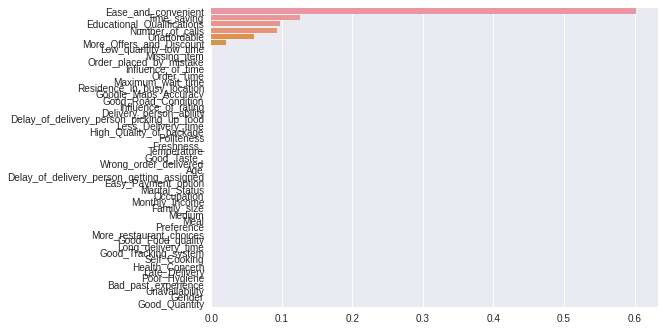

In [ ]:
imp_features_giniDT=pd.Series(clf_gini_DT.feature_importances_, index=df_train.columns).sort_values(ascending=False)
sns.barplot(x=imp_features_giniDT, y=imp_features_giniDT.index)


In [ ]:
# Entropy
clf_entropy_DT = DecisionTreeClassifier(criterion='entropy', random_state=100,
                                      max_depth=3, min_samples_leaf=5)
clf_entropy_DT.fit(df_train, y_train)
y_pred_entropy_DT= clf_entropy_DT.predict(df_test)
print('Predicted values:', y_pred_entropy_DT)
print('Accuracy:', accuracy_score(y_test, y_pred_entropy_DT)*100)
print('Confusion Matrix:', confusion_matrix(y_test, y_pred_entropy_DT))
print('Classification Report:', classification_report(y_test, y_pred_entropy_DT))

Predicted values: [0 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 1 0 1
 1 1 1 1 1 0 1 1 1 1 1 0 1 0 1 0 1 1 1 0 1 0 0 1 1 1 1 0 1 0 1 1 1 0 1 1 0
 1 1 0 1 1 0]
Accuracy: 88.88888888888889
Confusion Matrix: [[16  6]
 [ 7 88]]
Classification Report:               precision    recall  f1-score   support

           0       0.70      0.73      0.71        22
           1       0.94      0.93      0.93        95

    accuracy                           0.89       117
   macro avg       0.82      0.83      0.82       117
weighted avg       0.89      0.89      0.89       117



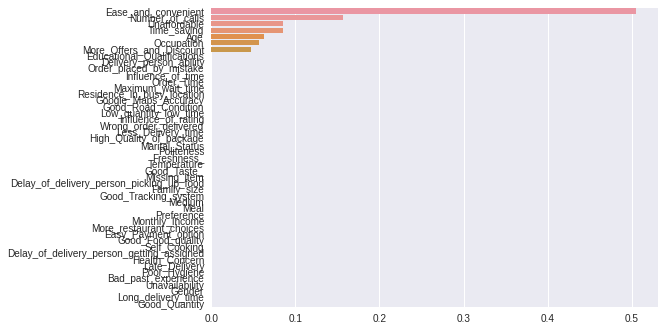

In [ ]:
imp_features_entropyDT=pd.Series(clf_entropy_DT.feature_importances_, index=df_train.columns).sort_values(ascending=False)
sns.barplot(x=imp_features_entropyDT, y=imp_features_entropyDT.index)


In [ ]:
y_pred_gini_DT=clf_gini_DT.predict(df_test)
roc_auc_gini_DT=roc_auc_score(y_test, clf_gini_DT.predict_proba (df_test)[:, 1])
fpr_gini_DT, tpr_gini_DT, thresholds_gini_DT=roc_curve (y_test, clf_gini_DT.predict_proba (df_test)[:, 1])
precision_gini_DT, recall_gini_DT, thres_gini_DT= precision_recall_curve(y_test, clf_gini_DT.predict_proba(df_test)[:, 1])
auc_score_gini_DT = auc(recall_gini_DT, precision_gini_DT)
F1_gini_DT = f1_score(y_test, y_pred_gini_DT)
accuracy_gini_DT=accuracy_score(y_test, y_pred_gini_DT)


y_pred_entropy_DT=clf_entropy_DT.predict(df_test)
roc_auc_entropy_DT=roc_auc_score(y_test, clf_entropy_DT.predict_proba (df_test)[:, 1])
fpr_entropy_DT, tpr_entropy_DT, thresholds_entropy_DT=roc_curve (y_test, clf_entropy_DT.predict_proba (df_test)[:, 1])
precision_entropy_DT, recall_entropy_DT, thres_entropy_DT= precision_recall_curve(y_test, clf_entropy_DT.predict_proba(df_test)[:, 1])
auc_score_entropy_DT = auc(recall_entropy_DT, precision_entropy_DT)
F1_entropy_DT = f1_score(y_test, y_pred_entropy_DT)
accuracy_entropy_DT=accuracy_score(y_test, y_pred_entropy_DT)

## Random Forest Classifier

In [45]:
from sklearn.ensemble import RandomForestClassifier
clf_RF =RandomForestClassifier(n_estimators=100)
clf_RF.fit(df_train, y_train)
y_pred_RF=clf_RF.predict(df_test)
print('Accuracy:', accuracy_score(y_pred_RF, y_test)*100, '\n')
print('Predictions:', list(y_pred_RF))
print('True values:', list(y_test))
print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred_RF))
print('Classification Report: \n', classification_report(y_test, y_pred_RF))

Accuracy: 93.16239316239316 

Predictions: [0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0]
True values: [0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0]
Confusion Matrix: 
 [[17  5]
 [ 3 92]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.85      0.77      0.81        22
           1       0.95      0.97      0.96        95

    accuracy

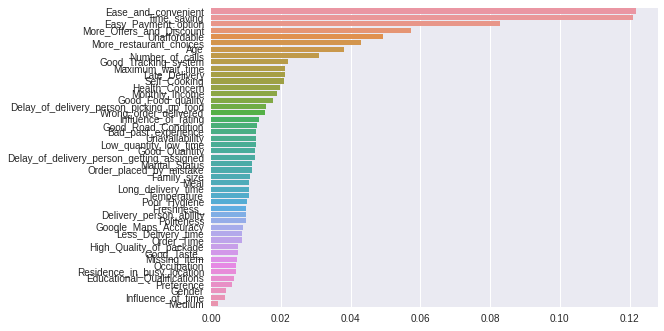

In [46]:
imp_features_RF=pd.Series(clf_RF.feature_importances_, index=df_train.columns).sort_values(ascending=False)
sns.barplot(x=imp_features_RF, y=imp_features_RF.index)


In [47]:
clf_RF.feature_importances_

array([0.03801545, 0.00427516, 0.01177368, 0.00712052, 0.01896596,
       0.00639689, 0.01098997, 0.00184905, 0.01092198, 0.00594334,
       0.12194008, 0.12098368, 0.04299071, 0.08275117, 0.05717067,
       0.01766854, 0.02212472, 0.02080223, 0.01970243, 0.02112216,
       0.01012919, 0.012986  , 0.01294933, 0.04914122, 0.01075573,
       0.0124724 , 0.01580212, 0.01530512, 0.00725827, 0.01158662,
       0.00382067, 0.00886673, 0.0212824 , 0.00697461, 0.00899131,
       0.01315854, 0.01290588, 0.00994079, 0.0136386 , 0.00893614,
       0.00779773, 0.0308173 , 0.00991566, 0.01008491, 0.0107376 ,
       0.00759478, 0.01264197])

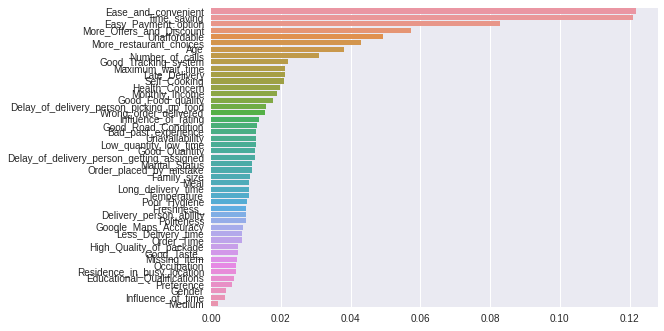

In [48]:
imp_features_RF=pd.Series(clf_RF.feature_importances_, index=df_train.columns).sort_values(ascending=False)
sns.barplot(x=imp_features_RF, y=imp_features_RF.index)
# feature_imp = pd.Series(CLF.feature_importances_,index=iris.feature_names).sort_values(ascending=False)
# feature_imp

### Hyperparameter Optimization

#### Random Search

In [49]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

params_random_RF = {'n_estimators': [130, 180, 230],
               'max_features': ['auto', 'sqrt'],
               'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
               'min_samples_split': [2, 5, 10],
               'min_samples_leaf': [1, 2, 4],
               'bootstrap': [True, False]}
# Random Search

# clf_RF_grid = GridSearchCV(estimator = RandomForestClassifier(), param_grid = params_grid_RF, 
#                           cv = 3, n_jobs = -1, verbose = 2)

clf_RF_random=RandomizedSearchCV(estimator=RandomForestClassifier(), param_distributions= params_random_RF, cv=5, verbose=1, 
                                    n_jobs=-1, n_iter=200, random_state=42)
clf_RF_random.fit(df_train, y_train)

best_random_RF1=clf_RF_random.best_estimator_
y_pred_RF1=best_random_RF1.predict(df_test)
print('Accuracy:', accuracy_score(y_pred_RF1, y_test)*100, '%')
# print('Cross Validation:\n',random_search_RF.cv_results_ )
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred_RF1))

Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Accuracy: 92.3076923076923 %
Confusion Matrix:
 [[16  6]
 [ 3 92]]


#### Grid Search

In [50]:
# Grid Search
from sklearn.model_selection import GridSearchCV

params_grid_RF = {
    
    'criterion': ['entropy', 'gini'],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3], #['auto', 'sqrt'],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

clf_RF_grid = GridSearchCV(estimator = RandomForestClassifier(), param_grid = params_grid_RF, 
                          cv = 3, n_jobs = -1, verbose = 2)
clf_RF_grid.fit(df_train, y_train)


Fitting 3 folds for each of 576 candidates, totalling 1728 fits
Accuracy: 0.9230769230769231
Confusion Matrix: [[15  2]
 [ 7 93]]


In [ ]:

best_grid=clf_RF_grid.best_estimator_
y_pred_RF2= clf_RF_grid.predict(df_test)
print("Accuracy:", accuracy_score(y_pred_RF2, y_test)*100)
print('Confusion Matrix:', confusion_matrix(y_pred_RF2, y_test))

In [51]:
## Try and Error method to finalize best set of parameters (Manual Hyperparameteric Tuning)

# n_estimators = [int(x) for x in range (200, 2000, 200)] 
# max_features = ['auto', 'sqrt'] 
# max_depth = [int(x) for x in np.linspace(10, 120, num = 12)]
# min_samples_split = [2, 6, 10] 
# min_samples_leaf = [1, 3, 4] 
# bootstrap = [True, False] 

# random_grid = {'n_estimators': n_estimators,
# 'max_features': max_features,
# 'max_depth': max_depth,
# 'min_samples_split': min_samples_split,
# 'min_samples_leaf': min_samples_leaf,
# 'bootstrap': bootstrap}

# from sklearn.model_selection import RandomizedSearchCV
# rf_random1 = RandomizedSearchCV(estimator = rf,param_distributions = random_grid,
#                n_iter = 100, cv = 5, verbose=2, random_state=35, n_jobs = -1)

# rf_random1.fit(df_train, y_train)

### Evaluation Metrics

In [52]:
# Without Hyperparameteric Tuning
y_pred_RF=clf_RF.predict(df_test)
roc_auc_RF=roc_auc_score(y_test, y_pred_RF)
fpr_RF, tpr_RF, thresholds_RF=roc_curve (y_test, clf_RF.predict_proba (df_test)[:, 1])
precision_RF, recall_RF, thres_RF= precision_recall_curve(y_test, clf_RF.predict_proba(df_test)[:, 1])
auc_score_RF = auc(recall_RF, precision_RF)
F1_RF = f1_score(y_test, y_pred_RF)
accuracy_RF=accuracy_score(y_test, y_pred_RF)



In [53]:
# Grid Search
y_pred_RF_grid=clf_RF_grid.predict(df_test)
roc_auc_RF_grid=roc_auc_score(y_test, y_pred_RF_grid)
fpr_RF_grid, tpr_RF_grid, thresholds_RF_grid=roc_curve (y_test, clf_RF_grid.predict_proba (df_test)[:, 1])
precision_RF_grid, recall_RF_grid, thres_RF_grid= precision_recall_curve(y_test, clf_RF_grid.predict_proba(df_test)[:, 1])
auc_score_RF_grid = auc(recall_RF_grid, precision_RF_grid)
F1_RF_grid = f1_score(y_test, y_pred_RF_grid)
accuracy_RF_grid=accuracy_score(y_test, y_pred_RF_grid)

# Random Search
y_pred_RF_random=clf_RF_random.predict(df_test)
roc_auc_RF_random=roc_auc_score(y_test, y_pred_RF_random)
fpr_RF_random, tpr_RF_random, thresholds_RF_random=roc_curve (y_test, clf_RF_random.predict_proba (df_test)[:, 1])
precision_RF_random, recall_RF_random, thres_RF_random= precision_recall_curve(y_test, clf_RF_random.predict_proba(df_test)[:, 1])
auc_score_RF_random = auc(recall_RF_random, precision_RF_random)
F1_RF_random = f1_score(y_test, y_pred_RF_random)
accuracy_RF_random=accuracy_score(y_test, y_pred_RF_random)


## Support Vector Machines

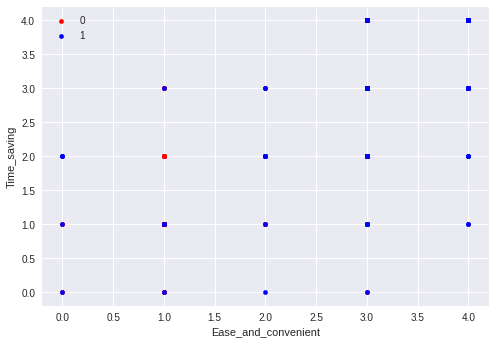

In [54]:
colors1={0:'red', 1:'blue'}
fig1, ax1=plt.subplots()
grouped1=df1.groupby('Output')
for key1, group1 in grouped1:
    group1.plot(ax=ax1, kind='scatter', x='Ease_and_convenient', y='Time_saving', label=key1, color=colors1[key1])

plt.show()

In [55]:
df1.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,388.0,24.628866,2.975593,18.0,23.0,24.0,26.0,33.0
Gender,388.0,0.572165,0.495404,0.0,0.0,1.0,1.0,1.0
Marital_Status,388.0,1.412371,0.895035,0.0,0.0,2.0,2.0,2.0
Occupation,388.0,1.902062,1.329722,0.0,0.0,3.0,3.0,3.0
Monthly_Income,388.0,1.443299,1.586240,0.0,0.0,1.0,3.0,4.0
Educational_Qualifications,388.0,1.069588,1.035695,0.0,0.0,1.0,2.0,4.0
Family_size,388.0,3.280928,1.351025,1.0,2.0,3.0,4.0,6.0
Medium,388.0,0.105670,0.408778,0.0,0.0,0.0,0.0,3.0
Meal,388.0,1.458763,1.166213,0.0,0.0,2.0,2.0,3.0
Preference,388.0,2.798969,0.438224,0.0,3.0,3.0,3.0,3.0


In [56]:
from sklearn.svm import SVC
#Kernel=Linear

clf_SVC_linear=SVC(kernel='linear', probability=True)
clf_SVC_linear.fit(df_train , y_train)
y_pred_SVC_linear=clf_SVC_linear.predict(df_test)

print('Kernel= Linear')
print('Accuracy of training set:', accuracy_score(y_train, clf_SVC_linear.predict(df_train))*100)
print('Accuracy of testing set:', accuracy_score(y_test, y_pred_SVC_linear)*100)
print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred_SVC_linear))
print ('\n')

# Kernel =rbf
clf_SVC_rbf=SVC(kernel='rbf', probability=True)
clf_SVC_rbf.fit(df_train, y_train)
print('Kernel=rbf')
print('Accuracy of training set:', accuracy_score(y_train, clf_SVC_rbf.predict(df_train))*100)
print('Accuracy of testing set:', accuracy_score(y_test, clf_SVC_rbf.predict(df_test))*100)
print('Confusion Matrix: \n:', confusion_matrix(y_test, clf_SVC_rbf.predict(df_test)))
print('\n')

# Kernel = Sigmoid
clf_SVC_sigmoid=SVC(kernel='sigmoid', probability=True)
clf_SVC_sigmoid.fit(df_train, y_train)
print('Kernel= Sigmoid')
print('Accuracy of training set:', accuracy_score(y_train, clf_SVC_sigmoid.predict(df_train))*100)
print('Accuracy of testing set:', accuracy_score(y_test, clf_SVC_sigmoid.predict(df_test))*100)
print('Confusion Matrix: \n:', confusion_matrix(y_test, clf_SVC_sigmoid.predict(df_test)))
print('\n')


Kernel= Linear
Accuracy of training set: 96.30996309963099
Accuracy of testing set: 85.47008547008546
Confusion Matrix: 
 [[15  7]
 [10 85]]


Kernel=rbf
Accuracy of training set: 91.88191881918819
Accuracy of testing set: 93.16239316239316
Confusion Matrix: 
: [[16  6]
 [ 2 93]]


Kernel= Sigmoid
Accuracy of training set: 74.90774907749078
Accuracy of testing set: 81.19658119658119
Confusion Matrix: 
: [[ 0 22]
 [ 0 95]]




### Hyperparameteric Tuning

#### Grid Search

In [57]:
# Grid Search
from sklearn.model_selection import GridSearchCV
params_grid_SVC=  {
    'C': [0.1, 1, 10, 100, 1000],
    'kernel':['rbf', 'linear'],
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001]
}
clf_SVC_grid= GridSearchCV(SVC(gamma='auto', probability=True),
                           param_grid= params_grid_SVC, cv=5, return_train_score=False)

clf_SVC_grid.fit(df_train, y_train)

print(clf_SVC_grid.best_params_)
print('Best Parameters:', clf_SVC_grid.best_estimator_)
y_pred_RF_grid=clf_SVC_grid.best_estimator_.predict(df_test)
print('Accuracy:', accuracy_score(y_test, y_pred_RF_grid))
print('Best Score:', clf_SVC_grid.best_score_)
print('Classification Report:\n', classification_report(y_test, clf_SVC_grid.predict(df_test)))

# ABC= pd.DataFrame(clf_SVC_grid.cv_results_)
# ABC[['param_C', 'param_kernel', 'mean_test_score']]

{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
Best Parameters: SVC(C=10, gamma=0.01, probability=True)
Accuracy: 0.8974358974358975
Best Score: 0.926060606060606
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.68      0.71        22
           1       0.93      0.95      0.94        95

    accuracy                           0.90       117
   macro avg       0.84      0.81      0.83       117
weighted avg       0.89      0.90      0.90       117



In [58]:
clf_SVC_grid.best_score_

0.926060606060606

#### Random Search

In [59]:
# Random Search
import scipy
params_random_SVC= {'C': scipy.stats.expon(scale=100), 'gamma': scipy.stats.expon(scale=.1),
  'kernel': ['rbf', 'linear', 'sigmoid'], 'class_weight':['balanced', None]}

clf_SVC_random=RandomizedSearchCV(estimator=SVC(gamma='auto', probability=True), param_distributions= params_random_SVC, cv=5, verbose=1, 
                                    n_jobs=-1, n_iter=200, random_state=42)
clf_SVC_random.fit(df_train,y_train)
best_random_SVC=clf_SVC_random.best_estimator_
y_pred_SVC_random= best_random_SVC.predict(df_test)
print('Accuracy:', accuracy_score(y_test, y_pred_SVC_random))
print('Best Score:', clf_SVC_random.best_score_)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Accuracy: 0.9316239316239316
Best Score: 0.9371717171717172


### Evaluation Metrics

In [60]:
 
# Find metrics using sklearn methods

y_pred_SVC_linear=clf_SVC_linear.predict(df_test)
y_proba_SVC_linear = clf_SVC_linear.predict_proba(df_test)[:,1]
roc_auc_SVC_linear=roc_auc_score(y_test, y_proba_SVC_linear)
fpr_SVC_linear, tpr_SVC_linear, thresholds_SVC_linear=roc_curve (y_test, y_proba_SVC_linear)
precision_SVC_linear, recall_SVC_linear, thres_SVC_linear= precision_recall_curve(y_test, y_proba_SVC_linear)
auc_score_SVC_linear = auc(recall_SVC_linear, precision_SVC_linear)
F1_SVC_linear = f1_score(y_test, y_pred_SVC_linear)
accuracy_SVC_linear=accuracy_score(y_test, y_pred_SVC_linear)


y_pred_SVC_rbf=clf_SVC_rbf.predict(df_test)
y_proba_SVC_rbf = clf_SVC_rbf.predict_proba(df_test)[:,1]
roc_auc_SVC_rbf=roc_auc_score(y_test, y_proba_SVC_rbf)
fpr_SVC_rbf, tpr_SVC_rbf, thresholds_SVC_rbf=roc_curve (y_test, y_proba_SVC_rbf)
precision_SVC_rbf, recall_SVC_rbf, thres_SVC_rbf= precision_recall_curve(y_test, y_proba_SVC_rbf)
auc_score_SVC_rbf = auc(recall_SVC_rbf, precision_SVC_rbf)
F1_SVC_rbf = f1_score(y_test, y_pred_SVC_rbf)
accuracy_SVC_rbf=accuracy_score(y_test, y_pred_SVC_rbf)


y_pred_SVC_sigmoid=clf_SVC_sigmoid.predict(df_test)
y_proba_SVC_sigmoid = clf_SVC_sigmoid.predict_proba(df_test)[:,1]
roc_auc_SVC_sigmoid=roc_auc_score(y_test, y_proba_SVC_sigmoid)
fpr_SVC_sigmoid, tpr_SVC_sigmoid, thresholds_SVC_sigmoid=roc_curve (y_test, y_proba_SVC_sigmoid)
precision_SVC_sigmoid, recall_SVC_sigmoid, thres_SVC_sigmoid= precision_recall_curve(y_test, y_proba_SVC_sigmoid)
auc_score_SVC_sigmoid = auc(recall_SVC_sigmoid, precision_SVC_sigmoid)
F1_SVC_sigmoid = f1_score(y_test, y_pred_SVC_sigmoid)
accuracy_SVC_sigmoid=accuracy_score(y_test, y_pred_SVC_sigmoid)


In [61]:
# Grid Search

y_pred_SVC_grid=clf_SVC_grid.predict(df_test)
y_proba_SVC_grid = clf_SVC_grid.predict_proba(df_test)[:,1]
roc_auc_SVC_grid=roc_auc_score(y_test, y_proba_SVC_grid)
fpr_SVC_grid, tpr_SVC_grid, thresholds_SVC_grid=roc_curve (y_test, y_proba_SVC_grid)
precision_SVC_grid, recall_SVC_grid, thres_SVC_grid= precision_recall_curve(y_test, y_proba_SVC_grid)
auc_score_SVC_grid = auc(recall_SVC_grid, precision_SVC_grid)
F1_SVC_grid = f1_score(y_test, y_pred_SVC_grid)
accuracy_SVC_grid=accuracy_score(y_test, y_pred_SVC_grid)

# Random Search


y_pred_SVC_random=clf_SVC_random.predict(df_test)
y_proba_SVC_random = clf_SVC_random.predict_proba(df_test)[:,1]
roc_auc_SVC_random=roc_auc_score(y_test, y_proba_SVC_random)
fpr_SVC_random, tpr_SVC_random, thresholds_SVC_random=roc_curve (y_test, y_proba_SVC_random)
precision_SVC_random, recall_SVC_random, thres_SVC_random= precision_recall_curve(y_test, y_proba_SVC_random)
auc_score_SVC_random = auc(recall_SVC_random, precision_SVC_random)
F1_SVC_random = f1_score(y_test, y_pred_SVC_random)
accuracy_SVC_random=accuracy_score(y_test, y_pred_SVC_random)

## K Nearest Neighbor classifier

### Select K best

Selecting best KNN classifier within the first 11 neighbors

KNN results with different neighbors: 
    accuracy_score  precision_score  recall_score
0        0.880342         0.945055      0.905263
1        0.811966         0.950617      0.810526
2        0.914530         0.938144      0.957895
3        0.897436         0.946237      0.926316
4        0.914530         0.929293      0.968421
5        0.905983         0.937500      0.947368
6        0.914530         0.929293      0.968421
7        0.897436         0.936842      0.936842
8        0.923077         0.938776      0.968421
9        0.931624         0.948454      0.968421


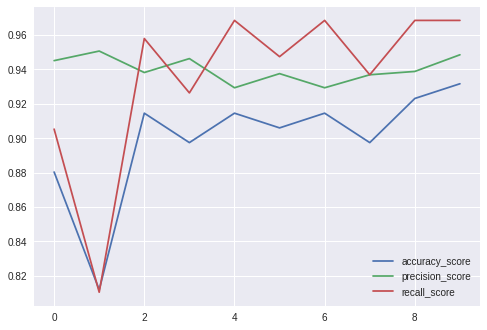

In [62]:
from sklearn.neighbors import KNeighborsClassifier
results_KNN = []

for i in range(1,11):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(df_train,y_train)
    y_pred_i = knn.predict(df_test)
    results_KNN.append([accuracy_score(y_test, y_pred_i), precision_score(y_test, y_pred_i), 
                       recall_score(y_test, y_pred_i)])

results_KNN = pd.DataFrame(results_KNN, columns=['accuracy_score', 'precision_score', 'recall_score'])
print('KNN results with different neighbors: \n', results_KNN)
# max=results_KNN
results_KNN.plot()

In [63]:
#value of nearest neighbors(n-1) which exibits the highest accuracy score, precision score and recall score:
results_KNN.idxmax(axis=0)

accuracy_score     9
precision_score    1
recall_score       4
dtype: int64

Selecting best KNN classifier within the first 50 neighbors

In [64]:
mean_acc=np.zeros((49))
std_acc=np.zeros((49))

# KNN from 1 to 50
for i in range(1, 50):
  KNN=KNeighborsClassifier(n_neighbors=i).fit(df_train, y_train)
  y_hat=KNN.predict(df_test)
  mean_acc[i-1]= accuracy_score(y_test, y_hat)
  std_acc[i-1]= np.std(y_hat==y_test)/np.sqrt(y_hat.shape[0])

print('Mean Accuracy: \n', mean_acc)

Mean Accuracy: 
 [0.88034188 0.81196581 0.91452991 0.8974359  0.91452991 0.90598291
 0.91452991 0.8974359  0.92307692 0.93162393 0.91452991 0.92307692
 0.92307692 0.92307692 0.92307692 0.92307692 0.91452991 0.92307692
 0.91452991 0.91452991 0.91452991 0.91452991 0.91452991 0.91452991
 0.91452991 0.91452991 0.90598291 0.90598291 0.90598291 0.90598291
 0.90598291 0.90598291 0.8974359  0.8974359  0.8974359  0.90598291
 0.8974359  0.8974359  0.8974359  0.8974359  0.88888889 0.88888889
 0.88888889 0.88888889 0.88888889 0.88888889 0.88888889 0.8974359
 0.88888889]


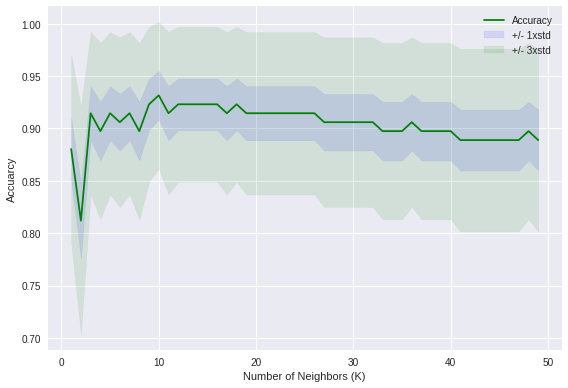

In [65]:
# Best K-value among the first 50 neighbors

plt.plot (range(1, 50), mean_acc, 'g')
plt.fill_between(range(1, 50), mean_acc-1 *std_acc, mean_acc+1 * std_acc, alpha=0.10, color = 'blue')
plt.fill_between(range(1, 50), mean_acc-3*std_acc, mean_acc+3 *std_acc, alpha=0.10, color='green')
plt.legend(('Accuracy', '+/- 1xstd', '+/- 3xstd'))
plt.ylabel('Accuarcy')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [66]:
print('Best Accuracy is with', (mean_acc.max())*100, '% with k=', mean_acc.argmax()+1)

Best Accuracy is with 93.16239316239316 % with k= 10


In [67]:
# Continue with KNN=10
clf_KNN=KNeighborsClassifier(n_neighbors=10, metric='minkowski')
clf_KNN.fit(df_train, y_train)
y_pred_KNN = clf_KNN.predict(df_test)
print('Accuracy: ', accuracy_score(y_test, y_pred_KNN)*100)
print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred_KNN))
print('Classification report: \n', classification_report(y_test, y_pred_KNN))
print('\nReal values:   ', list(y_test))
print('Predicted Values:', list(y_pred_KNN))

Accuracy:  93.16239316239316
Confusion Matrix: 
 [[17  5]
 [ 3 92]]
Classification report: 
               precision    recall  f1-score   support

           0       0.85      0.77      0.81        22
           1       0.95      0.97      0.96        95

    accuracy                           0.93       117
   macro avg       0.90      0.87      0.88       117
weighted avg       0.93      0.93      0.93       117


Real values:    [0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0]
Predicted Values: [0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

### Hyperparameteric Tuning

#### Grid Search

In [68]:
# Grid Search
param_grid_KNN=dict(n_neighbors=list(range(1, 31)))
clf_KNN_grid = GridSearchCV(KNeighborsClassifier(), param_grid_KNN, cv=10, scoring='accuracy', return_train_score=False,verbose=1)
grid_search_KNN= clf_KNN_grid.fit(df_train, y_train)

y_pred_KNN_grid= clf_KNN_grid.predict(df_test)
print('Best parameters:', grid_search_KNN.best_params_)
print('Accuracy (training set):', format(grid_search_KNN.best_score_ *100))
print('Accuracy (testing set):', accuracy_score(y_test, y_pred_KNN_grid)*100)
print('Confusion Matrix:', confusion_matrix(y_test, y_pred_KNN_grid))

Fitting 10 folds for each of 30 candidates, totalling 300 fits
Best parameters: {'n_neighbors': 1}
Accuracy (training set): 93.71693121693123
Accuracy (testing set): 88.03418803418803
Confusion Matrix: [[17  5]
 [ 9 86]]


### Evaluation Metrics

In [69]:
# Without Tuning

y_pred_KNN=clf_KNN.predict(df_test)
y_proba_KNN = clf_KNN.predict_proba(df_test)[:,1]
roc_auc_KNN=roc_auc_score(y_test, y_proba_KNN)
fpr_KNN, tpr_KNN, thresholds_KNN=roc_curve (y_test, y_proba_KNN)
precision_KNN, recall_KNN, thres_KNN= precision_recall_curve(y_test, y_proba_KNN)
auc_score_KNN = auc(recall_KNN, precision_KNN)
F1_KNN = f1_score(y_test, y_pred_KNN)
accuracy_KNN=accuracy_score(y_test, y_pred_KNN)

# Grid Search

y_pred_KNN_grid=clf_KNN_grid.predict(df_test)
y_proba_KNN_grid = clf_KNN_grid.predict_proba(df_test)[:,1]
roc_auc_KNN_grid=roc_auc_score(y_test, y_proba_KNN_grid)
fpr_KNN_grid, tpr_KNN_grid, thresholds_KNN_grid=roc_curve (y_test, y_proba_KNN_grid)
precision_KNN_grid, recall_KNN_grid, thres_KNN_grid= precision_recall_curve(y_test, y_proba_KNN_grid)
auc_score_KNN_grid = auc(recall_KNN_grid, precision_KNN_grid)
F1_KNN_grid = f1_score(y_test, y_pred_KNN_grid)
accuracy_KNN_grid=accuracy_score(y_test, y_pred_KNN_grid)

In [70]:
# Tensorflow1 Logistic Regression
tf.random.set_seed(42)

clf_log_tf = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

clf_log_tf.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(lr=0.03),
    metrics=[
        tf.keras.metrics.BinaryAccuracy(name='accuracy'),
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
)

history = clf_log_tf.fit(df_train, y_train, epochs=100)
clear_output()

## XGBoost

In [83]:
!pip install category_encoders
import category_encoders as ce
clear_output()

In [84]:
encoder=ce.OneHotEncoder(cols=['Gender', 'Marital_Status', 'Occupation', 'Monthly_Income',
       'Educational_Qualifications', 'Family_size', 'Time_saving', 'Good_Quantity','Meal',
       'Preference', 'Medium', 'Ease_and_convenient', 'More_restaurant_choices', 'Easy_Payment_option', 
       'More_Offers_and_Discount', 'Good_Food_quality', 'Good_Tracking_system', 'Self_Cooking', 
       'Health_Concern', 'Late_Delivery', 'Poor_Hygiene', 'Bad_past_experience', 'Unavailability', 
       'Unaffordable', 'Long_delivery_time', 'Delay_of_delivery_person_getting_assigned', 
       'Delay_of_delivery_person_picking_up_food', 'Wrong_order_delivered', 'Missing_item', 
       'Order_placed_by_mistake', 'Influence_of_time', 'Order_Time', 'Maximum_wait_time', 
       'Residence_in_busy_location', 'Google_Maps_Accuracy', 'Good_Road_Condition', 'Low_quantity_low_time', 
       'Delivery_person_ability', 'Influence_of_rating', 'Less_Delivery_time', 
       'High_Quality_of_package', 'Number_of_calls', 'Politeness', 'Freshness_', 'Temperature', 'Good_Taste_' ],
                         use_cat_names=True)
d=encoder.fit_transform(df0)
train, test = train_test_split(d, random_state=42)

In [85]:
y_train_1=train['Output']
df_train_1=train.drop('Output', axis=1)

y_test_1=test['Output']
df_test_1=test.drop('Output', axis=1)


In [86]:
import xgboost as xgb
clf_xgb=xgb.XGBClassifier(objective='binary:logistic', missing=None, seed=42)
clf_xgb.fit(df_train_1, y_train_1,
            verbose=True, 
            early_stopping_rounds=10,
            eval_metric='aucpr',
            eval_set=[(df_test_1, y_test_1)])


[0]	validation_0-aucpr:0.982146
Will train until validation_0-aucpr hasn't improved in 10 rounds.
[1]	validation_0-aucpr:0.98228
[2]	validation_0-aucpr:0.982357
[3]	validation_0-aucpr:0.982182
[4]	validation_0-aucpr:0.982769
[5]	validation_0-aucpr:0.982497
[6]	validation_0-aucpr:0.982638
[7]	validation_0-aucpr:0.982782
[8]	validation_0-aucpr:0.982497
[9]	validation_0-aucpr:0.981006
[10]	validation_0-aucpr:0.991543
[11]	validation_0-aucpr:0.991543
[12]	validation_0-aucpr:0.990941
[13]	validation_0-aucpr:0.989496
[14]	validation_0-aucpr:0.989496
[15]	validation_0-aucpr:0.989316
[16]	validation_0-aucpr:0.993419
[17]	validation_0-aucpr:0.992008
[18]	validation_0-aucpr:0.993419
[19]	validation_0-aucpr:0.993971
[20]	validation_0-aucpr:0.993237
[21]	validation_0-aucpr:0.993078
[22]	validation_0-aucpr:0.993353
[23]	validation_0-aucpr:0.992136
[24]	validation_0-aucpr:0.992964
[25]	validation_0-aucpr:0.992616
[26]	validation_0-aucpr:0.992686
[27]	validation_0-aucpr:0.993036
[28]	validation_0-auc

XGBClassifier(seed=42)

In [87]:
y_pred_xgb=clf_xgb.predict(df_test_1)
print('accuracy:', accuracy_score(y_test_1, y_pred_xgb))

accuracy: 0.9278350515463918


#### Grid Search

In [88]:
# param_grid_xgb= {
#     'max_depth': [3, 4, 5] ,
#     'learning_rate': [0.1, 0.01, 0.05],
#     'gamma': [0, 0.25, 1.0],
#     'reg_lambda': [0, 1.0, 10.0],
#     'scale_pos_weight': [1, 3, 5]
# }

param_grid_xgb= {
    'max_depth': [3] ,
    'learning_rate': [0.05, 0.5, 1],
    'gamma': [0, 0.25, 1.0],
    'reg_lambda': [10.0, 20, 100],
    'scale_pos_weight': [3]
}

optimal_params=GridSearchCV(
    estimator=xgb.XGBClassifier(objective='binary:logistic',
                                seed=42,
                                subsample=0.9,
                                colsample_bytree=0.5),
                            param_grid=param_grid_xgb,
                            scoring='roc_auc',
                            verbose=0,
                            n_jobs= 10,
                            cv=3
)

optimal_params.fit(df_train_1, y_train_1)
print(optimal_params.best_params_)

{'gamma': 0, 'learning_rate': 1, 'max_depth': 3, 'reg_lambda': 100, 'scale_pos_weight': 3}


#### Interpreting Optimized XGBoost Model


In [89]:
clf_xgb_grid = xgb.XGBClassifier(seed=42,
                            objective='binary:logistic',
                            gamma=0.25,
                            learn_rate=0.05,
                            max_depth=3,
                            reg_lambda=0,
                            subsample=0.9,
                            colsample_bytree=0.5)

clf_xgb_grid.fit(df_train_1, y_train_1,
            verbose=True,
            early_stopping_rounds=10,
            eval_metric='aucpr',
            eval_set=[(df_test_1, y_test_1)])

[0]	validation_0-aucpr:0.979448
Will train until validation_0-aucpr hasn't improved in 10 rounds.
[1]	validation_0-aucpr:0.977453
[2]	validation_0-aucpr:0.977804
[3]	validation_0-aucpr:0.976658
[4]	validation_0-aucpr:0.977117
[5]	validation_0-aucpr:0.98688
[6]	validation_0-aucpr:0.986739
[7]	validation_0-aucpr:0.995521
[8]	validation_0-aucpr:0.994887
[9]	validation_0-aucpr:0.993911
[10]	validation_0-aucpr:0.993465
[11]	validation_0-aucpr:0.993591
[12]	validation_0-aucpr:0.994519
[13]	validation_0-aucpr:0.99527
[14]	validation_0-aucpr:0.995041
[15]	validation_0-aucpr:0.996276
[16]	validation_0-aucpr:0.995628
[17]	validation_0-aucpr:0.995453
[18]	validation_0-aucpr:0.995983
[19]	validation_0-aucpr:0.996295
[20]	validation_0-aucpr:0.995495
[21]	validation_0-aucpr:0.995142
[22]	validation_0-aucpr:0.995103
[23]	validation_0-aucpr:0.994545
[24]	validation_0-aucpr:0.994545
[25]	validation_0-aucpr:0.99402
[26]	validation_0-aucpr:0.993804
[27]	validation_0-aucpr:0.993286
[28]	validation_0-aucpr

XGBClassifier(colsample_bytree=0.5, gamma=0.25, learn_rate=0.05, reg_lambda=0,
              seed=42, subsample=0.9)

In [90]:
y_pred_xgb_grid=clf_xgb_grid.predict(df_test_1)
accuracy_score(y_test_1, y_pred_xgb_grid)

0.9381443298969072

In [91]:
from sklearn.metrics import plot_confusion_matrix

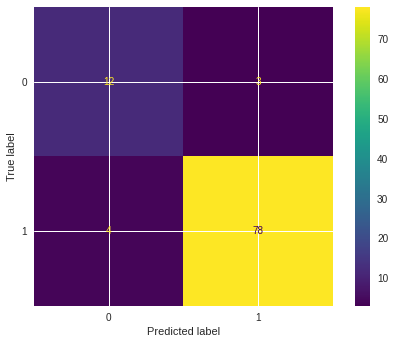

In [92]:
plot_confusion_matrix(clf_xgb, df_test_1, y_test_1, values_format='d')

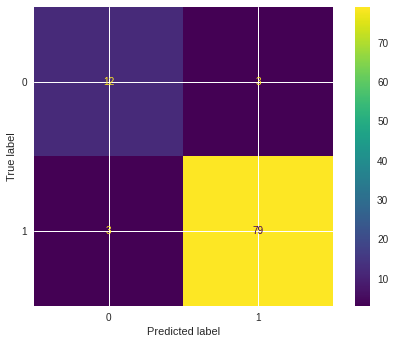

In [93]:
plot_confusion_matrix(clf_xgb_grid, df_test_1, y_test_1, values_format='d')

### Evaluation Metrics

In [95]:
# Without Tuning

# y_pred_KNN=clf_KNN.predict(df_test)

y_proba_xgb = clf_xgb.predict_proba(df_test_1)[:,1]
roc_auc_xgb=roc_auc_score(y_test_1, y_proba_xgb)
fpr_xgb, tpr_xgb, thresholds_xgb=roc_curve (y_test_1, y_proba_xgb)
precision_xgb, recall_xgb, thres_xgb= precision_recall_curve(y_test_1, y_proba_xgb)
auc_score_xgb = auc(recall_xgb, precision_xgb)
F1_xgb = f1_score(y_test_1, y_pred_xgb)
accuracy_xgb=accuracy_score(y_test_1, y_pred_xgb)

# Grid Search

y_pred_xgb_grid=clf_xgb_grid.predict(df_test_1)

y_proba_xgb_grid = clf_xgb_grid.predict_proba(df_test_1)[:,1]
roc_auc_xgb_grid=roc_auc_score(y_test_1, y_proba_xgb_grid)
fpr_xgb_grid, tpr_xgb_grid, thresholds_xgb_grid=roc_curve (y_test_1, y_proba_xgb_grid)
precision_xgb_grid, recall_xgb_grid, thres_xgb_grid= precision_recall_curve(y_test_1, y_proba_xgb_grid)
auc_score_xgb_grid = auc(recall_xgb_grid, precision_xgb_grid)
F1_xgb_grid = f1_score(y_test_1, y_pred_xgb_grid)
accuracy_xgb_grid=accuracy_score(y_test_1, y_pred_xgb_grid)

## Logistic Regression using Tensorflow

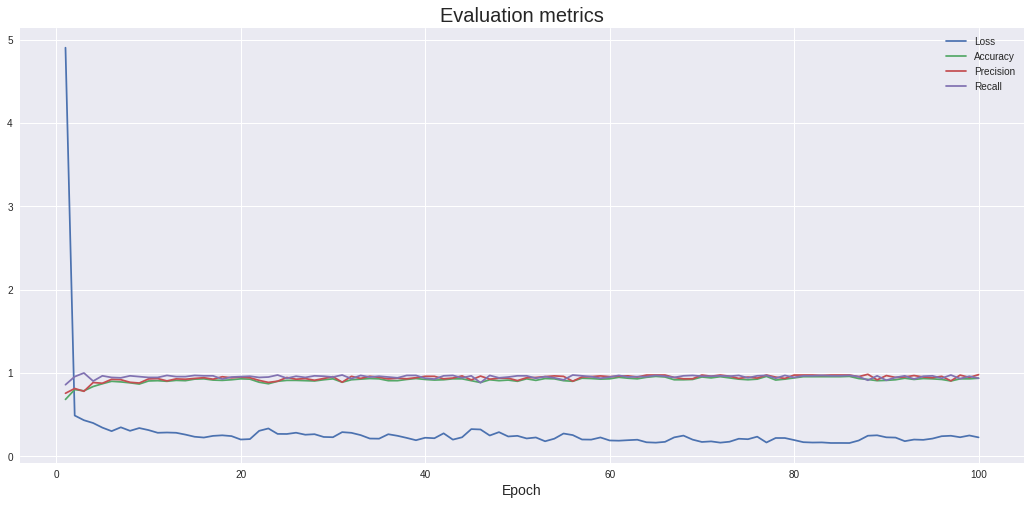

In [96]:
from matplotlib import rcParams
rcParams['figure.figsize']=(18, 8)
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False

plt.plot(
    np.arange(1, 101), 
    history.history['loss'], label='Loss'
)
plt.plot(
    np.arange(1, 101), 
    history.history['accuracy'], label='Accuracy'
)
plt.plot(
    np.arange(1, 101), 
    history.history['precision'], label='Precision'
)
plt.plot(
    np.arange(1, 101), 
    history.history['recall'], label='Recall'
)
plt.title('Evaluation metrics', size=20)
plt.xlabel('Epoch', size=14)
plt.legend();

ROC_AUC Score :  0.9045454545454545
Threshold value is: 0.9253323


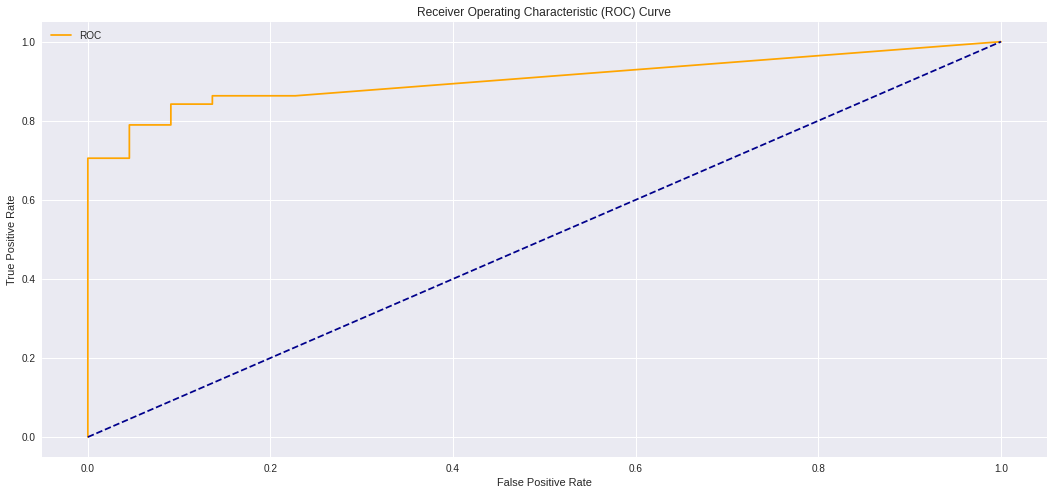

In [97]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

y_pred_log_tf=clf_log_tf.predict(df_test)
fpr_log_tf, tpr_log_tf, thresholds_log_tf = roc_curve(y_test, y_pred_log_tf)
roc_auc = auc(fpr_log_tf, tpr_log_tf)
print("ROC_AUC Score : ",roc_auc)
# print("Function for ROC_AUC Score : ",roc_auc_score(y_test, y_pred_log_tf))
# Function present
optimal_idx = np.argmax(tpr_log_tf - fpr_log_tf)
optimal_threshold = thresholds_log_tf[optimal_idx]
print("Threshold value is:", optimal_threshold)
plot_roc_curve(fpr_log_tf, tpr_log_tf)

In [98]:
y_test.to_numpy()

array([0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 0])

# Saving the Models

In [103]:
import pickle
pickle.dump(clf_log, open('clf_log.pkl', 'wb'))
# pickle.dump(linear_est, open('linear_est.pkl', 'wb'))
# pickle.dump(classifier1, open('classifier1.pkl', 'wb'))
pickle.dump(clf_gNB, open('clf_gNB.pkl', 'wb'))
pickle.dump(clf_mNB, open('clf_mNB.pkl', 'wb'))
pickle.dump(clf_gini_DT, open('clf_gini_DT.pkl', 'wb'))
pickle.dump(clf_entropy_DT, open('clf_entropy_DT.pkl', 'wb'))

pickle.dump(clf_SVC_rbf, open('clf_SVC_rbf.pkl', 'wb'))
pickle.dump(clf_SVC_sigmoid, open('clf_SVC_sigmoid.pkl', 'wb'))
pickle.dump(clf_SVC_grid, open('clf_SVC_grid.pkl', 'wb'))
pickle.dump(clf_SVC_random, open('clf_SVC_random.pkl', 'wb'))

pickle.dump(clf_KNN, open('clf_KNN.pkl', 'wb'))
pickle.dump(clf_KNN_grid, open('clf_KNN_grid.pkl', 'wb'))

pickle.dump(clf_xgb, open('clf_xgb.pkl', 'wb'))
pickle.dump(clf_xgb_grid, open('clf_xgb_grid.pkl', 'wb'))

pickle.dump(clf_RF, open('clf_RF.pkl', 'wb'))
pickle.dump(clf_RF_grid, open('clf_RF_grid.pkl', 'wb'))
pickle.dump(clf_RF_random, open('clf_RF_random.pkl', 'wb'))
# pickle.dump(clf_RF, open('clf_RF.pkl', 'wb'))
# pickle.dump(clf_RF, open('clf_RF.pkl', 'wb'))


# Plotting Metrics Curve

## ROC-AUC curves

* **Receiver Operator Characteristic (ROC) curve: Evaluation metric, probablity curve that plots TPR and FPR for various threshold values.**

* **Area Under Curve (AUC): Summary of ROC curve and measures the ability of classifier to distinguish between positive and negative classes**

* Higher the AUC, better the performance of the model

According to the above curve, since the AUC is the highest for SVC (RBF), Multinomial Naive Bayes and Gaussian Naive Bayes, they signify better performance.

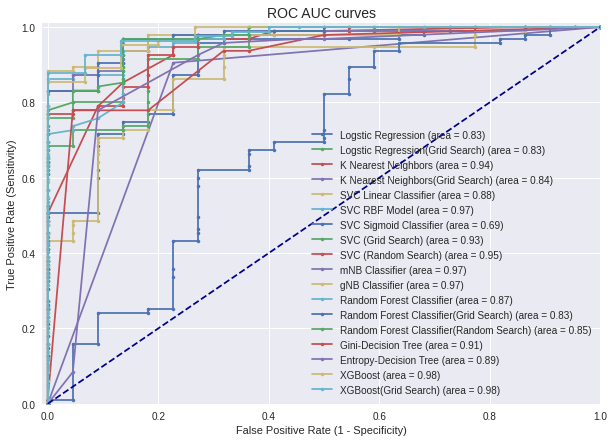

In [99]:
plt.figure(figsize=(10,7))

plt.plot(fpr_log,tpr_log, marker=".", label='Logstic Regression (area = %0.2f)'%roc_auc_log)
plt.plot(fpr_log_grid,tpr_log_grid, marker=".", label='Logstic Regression(Grid Search) (area = %0.2f)'%roc_auc_log_grid)


plt.plot(fpr_KNN,tpr_KNN, marker=".", label='K Nearest Neighbors (area = %0.2f)'%roc_auc_KNN)
plt.plot(fpr_KNN_grid,tpr_KNN_grid, marker=".", label='K Nearest Neighbors(Grid Search) (area = %0.2f)'%roc_auc_KNN_grid)


plt.plot(fpr_SVC_linear,tpr_SVC_linear, marker=".", label='SVC Linear Classifier (area = %0.2f)'%roc_auc_SVC_linear)
plt.plot(fpr_SVC_rbf,tpr_SVC_rbf, marker=".", label='SVC RBF Model (area = %0.2f)'%roc_auc_SVC_rbf)
plt.plot(fpr_SVC_sigmoid,tpr_SVC_sigmoid, marker=".", label='SVC Sigmoid Classifier (area = %0.2f)'%roc_auc_SVC_sigmoid)

plt.plot(fpr_SVC_grid,tpr_SVC_grid, marker=".", label='SVC (Grid Search) (area = %0.2f)'%roc_auc_SVC_grid)
plt.plot(fpr_SVC_random,tpr_SVC_random, marker=".", label='SVC (Random Search) (area = %0.2f)'%roc_auc_SVC_random)


plt.plot(fpr_mNB,tpr_mNB, marker=".", label='mNB Classifier (area = %0.2f)'%roc_auc_mNB)
plt.plot(fpr_gNB,tpr_gNB, marker=".", label='gNB Classifier (area = %0.2f)'%roc_auc_gNB)


plt.plot(fpr_RF,tpr_RF, marker=".", label='Random Forest Classifier (area = %0.2f)'%roc_auc_RF)
plt.plot(fpr_RF_grid,tpr_RF_grid, marker=".", label='Random Forest Classifier(Grid Search) (area = %0.2f)'%roc_auc_RF_grid)
plt.plot(fpr_RF_random,tpr_RF_random, marker=".", label='Random Forest Classifier(Random Search) (area = %0.2f)'%roc_auc_RF_random)


plt.plot(fpr_gini_DT,tpr_gini_DT, marker=".", label='Gini-Decision Tree (area = %0.2f)'%roc_auc_gini_DT)
plt.plot(fpr_entropy_DT,tpr_entropy_DT, marker=".", label='Entropy-Decision Tree (area = %0.2f)'%roc_auc_entropy_DT)

plt.plot(fpr_xgb,tpr_xgb, marker=".", label='XGBoost (area = %0.2f)'%roc_auc_xgb)
plt.plot(fpr_xgb_grid,tpr_xgb_grid, marker=".", label='XGBoost(Grid Search) (area = %0.2f)'%roc_auc_xgb_grid)


plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')

plt.xlim([-0.01,1.0])
plt.ylim([0.0,1.01])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('ROC AUC curves', fontsize=14)
plt.legend()
plt.show()


## Precision-Recall curves

**Precision** represents the ratio of true positives 
predicted wrt to the total predicted positives. 

**Recall** or *Sensitivity* represents the ratio of True positives predicted wrt to the total actual positives. 

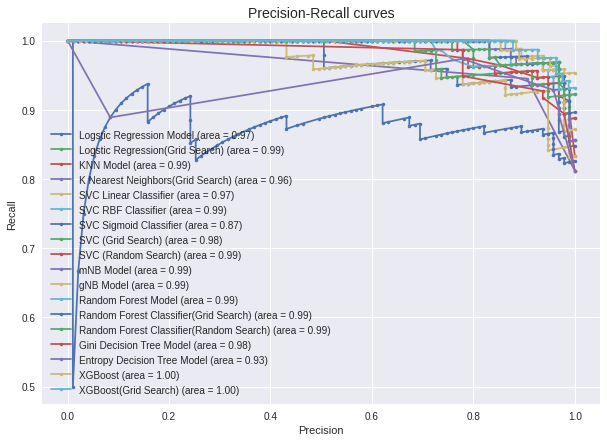

In [100]:
plt.figure(figsize=(10,7))

plt.plot(recall_log,precision_log, marker=".", label='Logstic Regression Model (area = %0.2f)'%auc_score_log)
plt.plot(recall_log_grid,precision_log_grid, marker=".", label='Logstic Regression(Grid Search) (area = %0.2f)'%auc_score_log_grid)


plt.plot(recall_KNN,precision_KNN, marker=".", label='KNN Model (area = %0.2f)'%auc_score_KNN)
plt.plot(recall_KNN_grid,precision_KNN_grid, marker=".", label='K Nearest Neighbors(Grid Search) (area = %0.2f)'%auc_score_KNN_grid)


plt.plot(recall_SVC_linear,precision_SVC_linear, marker=".", label='SVC Linear Classifier (area = %0.2f)'%auc_score_SVC_linear)
plt.plot(recall_SVC_rbf,precision_SVC_rbf, marker=".", label='SVC RBF Classifier (area = %0.2f)'%auc_score_SVC_rbf)
plt.plot(recall_SVC_sigmoid,precision_SVC_sigmoid, marker=".", label='SVC Sigmoid Classifier (area = %0.2f)'%auc_score_SVC_sigmoid)

plt.plot(recall_SVC_grid,precision_SVC_grid, marker=".", label='SVC (Grid Search) (area = %0.2f)'%auc_score_SVC_grid)
plt.plot(recall_SVC_random,precision_SVC_random, marker=".", label='SVC (Random Search) (area = %0.2f)'%auc_score_SVC_random)


plt.plot(recall_mNB,precision_mNB, marker=".", label='mNB Model (area = %0.2f)'%auc_score_mNB)
plt.plot(recall_gNB,precision_gNB, marker=".", label='gNB Model (area = %0.2f)'%auc_score_gNB)

plt.plot(recall_RF,precision_RF, marker=".", label='Random Forest Model (area = %0.2f)'%auc_score_RF)
plt.plot(recall_RF_grid,precision_RF_grid, marker=".", label='Random Forest Classifier(Grid Search) (area = %0.2f)'%auc_score_RF_grid)
plt.plot(recall_RF_random,precision_RF_random, marker=".", label='Random Forest Classifier(Random Search) (area = %0.2f)'%auc_score_RF_random)

plt.plot(recall_gini_DT,precision_gini_DT, marker=".", label='Gini Decision Tree Model (area = %0.2f)'%auc_score_gini_DT)
plt.plot(recall_entropy_DT,precision_entropy_DT, marker=".", label='Entropy Decision Tree Model (area = %0.2f)'%auc_score_entropy_DT)

plt.plot(recall_xgb,precision_xgb, marker=".", label='XGBoost (area = %0.2f)'%auc_score_xgb)
plt.plot(recall_xgb_grid,precision_xgb_grid, marker=".", label='XGBoost(Grid Search) (area = %0.2f)'%auc_score_xgb_grid)

# plt.plot([0, 1], [1, 0], color='darkblue', linestyle='--')

plt.xlabel('Precision')
plt.ylabel('Recall')
plt.title('Precision-Recall curves', fontsize=14)
plt.legend()

* Higher the AUC, better the precision and accuracy of the model.

According to the above curve, since the AUC is the highest for SVC (RBF), Random Forest Classifier, Multinomial Naive Bayes and Gaussian Naive Bayes, they signify better performance.

# Comparison between Models

In [101]:
# AUC-ROC Score represents the Area Under ROC Curve.
# AUC-PR Score represents the Area Under PR curve.

Model_Comparison = pd.DataFrame({
    'Model':         [ 'Logistic Regression', 'Logistic Regression(Grid Search)','K-Nearest Neighbor','K-Nearest Neighbor(Grid Search)', 'Multinomial Naive Bayes', 'Gaussian Naive Bayes', 'Support Vector Machine (Linear)', 'Support Vector Machine (RBF)', 'Support Vector Machine (Sigmoid)','Support Vector Machine (Grid Search)','Support Vector Machine (Random Search)', 'Random Forest','Random Forest(Grid Search)','Random Forest(Random Search)', 'Gini Decision Tree','Entropy Decision Tree', 'XGBoost', 'XGBoost(Grid Search)'],
    'Accuracy (%)':  [round(accuracy_log,4)*100,round(accuracy_log_grid,4)*100,   round(accuracy_KNN,4)*100,round(accuracy_KNN_grid,4)*100,   round(accuracy_mNB, 4)*100,round(accuracy_gNB, 4)*100, round(accuracy_SVC_linear,4)*100, round(accuracy_SVC_rbf,4)*100, round(accuracy_SVC_sigmoid,4)*100,round(accuracy_SVC_grid,4)*100,round(accuracy_SVC_random,4)*100, round(accuracy_RF,4)*100,round(accuracy_RF_grid,4)*100,round(accuracy_RF_random,4)*100, round(accuracy_gini_DT,4)*100, round(accuracy_entropy_DT,4)*100, round(accuracy_xgb,4)*100, round(accuracy_xgb_grid,4)*100],
    'AUC_ROC Score': [round(roc_auc_log,2),round(roc_auc_log_grid,2),   round(roc_auc_KNN,2),round(roc_auc_KNN_grid,2), round(roc_auc_mNB, 2),round(roc_auc_gNB, 2), round(roc_auc_SVC_linear,2), round(roc_auc_SVC_rbf,2), round(roc_auc_SVC_sigmoid,2), round(roc_auc_SVC_grid,2), round(roc_auc_SVC_random,2), round(roc_auc_RF,2),round(roc_auc_RF_grid,2),round(roc_auc_RF_random,2), round(roc_auc_gini_DT,2), round(roc_auc_entropy_DT,2), round(roc_auc_xgb,2), round(roc_auc_xgb_grid,2)],
    'AUC_PR Score':  [round(auc_score_log,2),round(auc_score_log_grid,2),   round(auc_score_KNN,2),round(auc_score_KNN_grid,2), round(auc_score_mNB, 2),round(auc_score_gNB, 2), round(auc_score_SVC_linear,2), round(auc_score_SVC_rbf,2), round(auc_score_SVC_sigmoid,2),round(auc_score_SVC_grid,2), round(auc_score_SVC_random,2), round(auc_score_RF,2),round(auc_score_RF_grid,2),round(auc_score_RF_random,2), round(auc_score_gini_DT,2), round(auc_score_entropy_DT,2), round(auc_score_xgb,2), round(auc_score_xgb_grid,2)],
    'F1 Score':      [round(F1_log,2),round(F1_log_grid,2),    round(F1_KNN,2),round(F1_KNN,2), round(F1_mNB, 2),round(F1_gNB, 2), round(F1_SVC_linear,2), round(F1_SVC_rbf,2), round(F1_SVC_sigmoid,2),round(F1_SVC_grid,2), round(F1_SVC_random,2), round(F1_RF,2),round(F1_RF_grid,2),round(F1_RF_random,2), round(F1_gini_DT,2), round(F1_entropy_DT,2), round(F1_xgb,2), round(F1_xgb_grid,2)]})

Model_Comparison_df = Model_Comparison.sort_values(by='F1 Score', ascending=False)
Model_Comparison_df = Model_Comparison_df.set_index('F1 Score')
Model_Comparison_df.reset_index().set_index('Model')

,F1 Score,Accuracy (%),AUC_ROC Score,AUC_PR Score
Model,,,,
XGBoost(Grid Search),0.96,93.81,0.98,1.00
Support Vector Machine (Random Search),0.96,93.16,0.95,0.99
K-Nearest Neighbor,0.96,93.16,0.94,0.99
K-Nearest Neighbor(Grid Search),0.96,88.03,0.84,0.96
XGBoost,0.96,92.78,0.98,1.00
Support Vector Machine (RBF),0.96,93.16,0.97,0.99
Random Forest,0.96,93.16,0.87,0.99
Random Forest(Random Search),0.95,92.31,0.85,0.99
Random Forest(Grid Search),0.95,92.31,0.83,0.99


***EVALUATION METRICS***

* **Accuracy** represents how well classifier can classify true positives and true negatives
* **Specificity** or *True Negative Rate* represents the ratio of true negatives predicted wrt to the total actual negatives.
* **F1-Score** represents the Harmonic mean of Precision and Recall.

In the above dataset it is important to decrease false negatives (not focusing on important customers), thus it is important to focus on recall. However